In [ ]:
import numpy as np
import tensorflow as tf          
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, losses, metrics
import keras
import seaborn as sns
%matplotlib inline

In [ ]:
missing_values = ["unknown"] 
df2 = pd.read_csv('/content/sample_data/bank.csv', na_values = missing_values)

df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,NaN,no
11158,39,services,married,secondary,no,733,no,no,NaN,16,jun,83,4,-1,0,NaN,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,NaN,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df2.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [ ]:
df2.drop(columns='poutcome', inplace = True)
df2.dropna(inplace = True)
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8393 entries, 367 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8393 non-null   int64 
 1   job        8393 non-null   object
 2   marital    8393 non-null   object
 3   education  8393 non-null   object
 4   default    8393 non-null   object
 5   balance    8393 non-null   int64 
 6   housing    8393 non-null   object
 7   loan       8393 non-null   object
 8   contact    8393 non-null   object
 9   day        8393 non-null   int64 
 10  month      8393 non-null   object
 11  duration   8393 non-null   int64 
 12  campaign   8393 non-null   int64 
 13  pdays      8393 non-null   int64 
 14  previous   8393 non-null   int64 
 15  deposit    8393 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

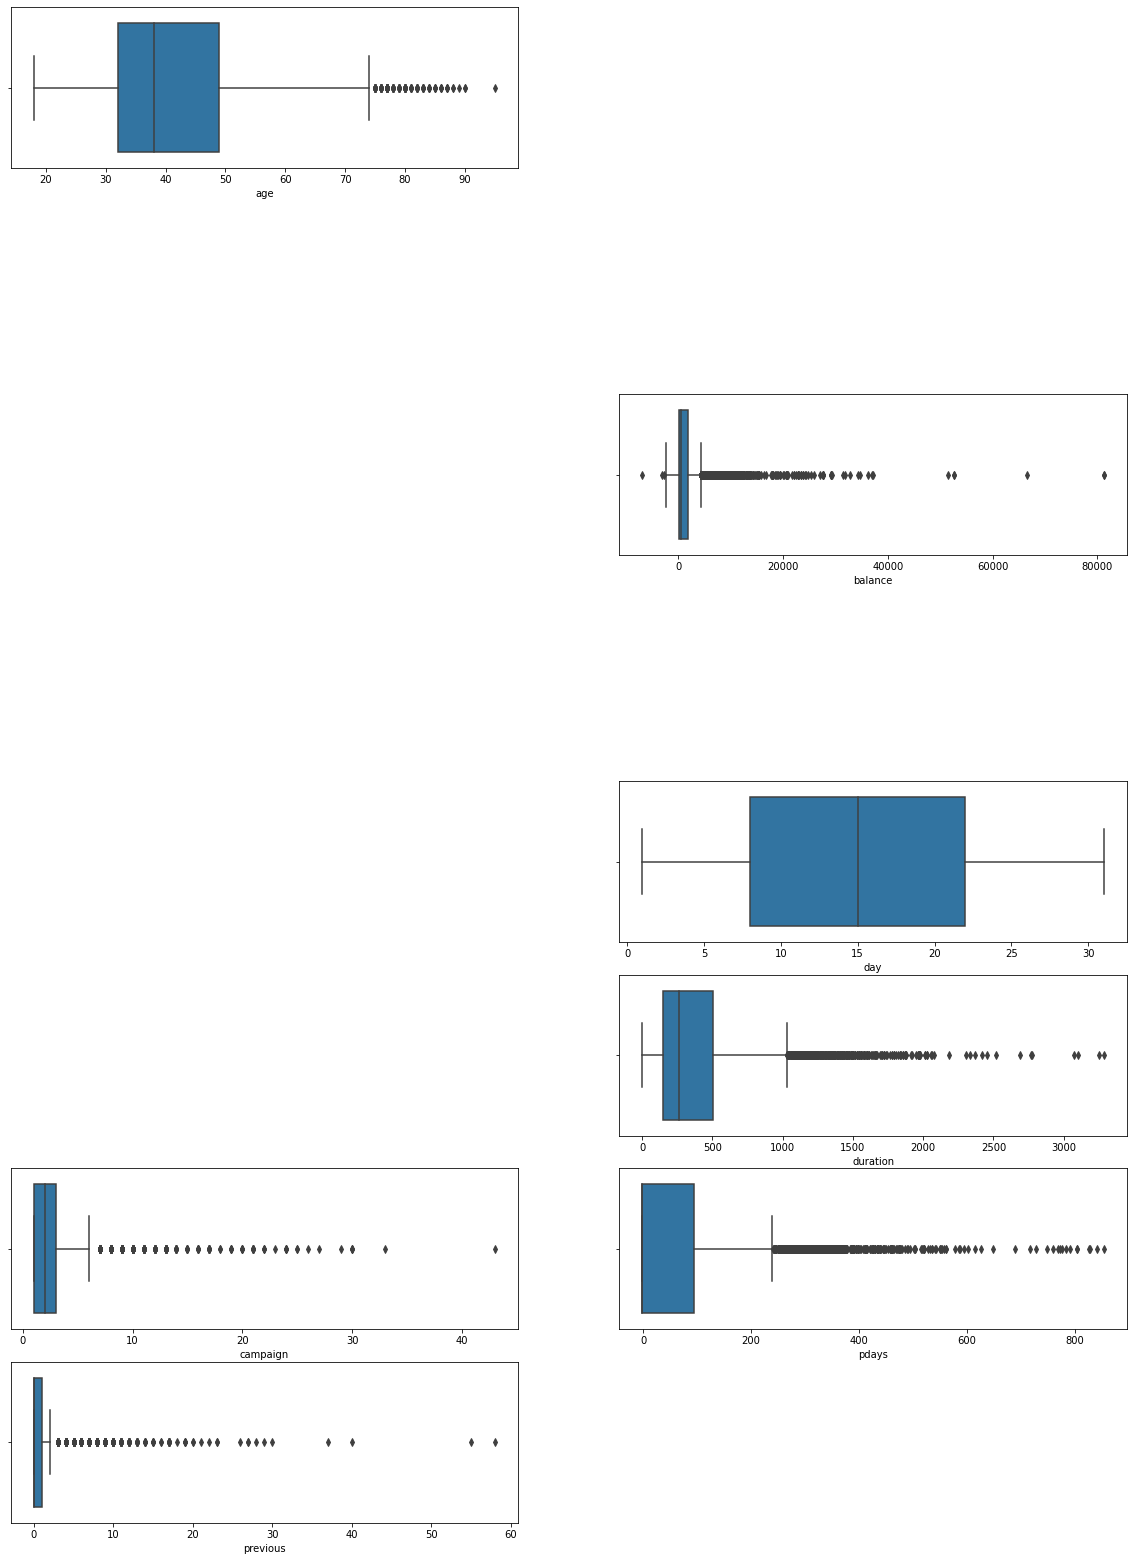

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df2.columns):
  if df2[col].dtype != 'object':
    ax = plt.subplot(10, 2, i+1)
    max_val = df2[col].quantile(0.75)
    min_val = df2[col].quantile(0.25)
      #sns.boxplot(df2[col])
    sns.boxplot(df2[col])

plt.show()

In [ ]:
X = df2.copy()
X.drop(columns= 'deposit', inplace=True)
X2 = df2.copy()
X = pd.get_dummies(X, drop_first=True)
X2 = pd.get_dummies(X2, drop_first=True)
y = np.where(df2.deposit == "yes", 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,deposit_yes
age,1.000000,0.115004,0.012657,0.009181,-0.013919,-0.005093,0.010498,-0.063234,0.016780,0.077550,...,0.017627,0.010020,-0.009783,-0.026058,0.031842,-0.114661,0.018885,0.059643,0.043394,0.042120
balance,0.115004,1.000000,0.001971,0.018256,-0.022977,0.010691,0.026242,-0.038392,0.012473,-0.007180,...,-0.003871,-0.028153,-0.071597,0.021535,0.030196,-0.044387,0.077511,0.020445,0.022061,0.079477
day,0.012657,0.001971,1.000000,-0.021564,0.176623,-0.087174,-0.067881,-0.036342,-0.004136,0.028750,...,-0.269182,0.241003,0.168269,-0.162350,-0.046335,-0.136448,0.077862,0.083838,-0.080632,-0.072449
duration,0.009181,0.018256,-0.021564,1.000000,-0.033177,-0.030449,-0.030980,0.040298,0.000243,-0.020007,...,-0.028189,-0.011229,0.057725,-0.026251,-0.044158,0.028833,-0.006668,-0.011668,-0.007654,0.418833
campaign,-0.013919,-0.022977,0.176623,-0.033177,1.000000,-0.113070,-0.049428,-0.005756,0.007009,0.020494,...,-0.033242,-0.057336,0.154963,-0.053837,-0.029223,-0.054167,-0.085622,-0.075068,-0.052605,-0.145243
pdays,-0.005093,0.010691,-0.087174,-0.030449,-0.113070,1.000000,0.486615,0.011714,-0.032215,-0.029054,...,0.021064,0.001675,-0.159241,0.002669,0.001881,0.187897,-0.051134,0.059964,0.086609,0.103290
previous,0.010498,0.026242,-0.067881,-0.030980,-0.049428,0.486615,1.000000,-0.015208,-0.023242,-0.027292,...,0.032765,0.023353,-0.123268,0.041455,0.015800,0.075385,-0.010713,0.043796,0.072544,0.107264
job_blue-collar,-0.063234,-0.038392,-0.036342,0.040298,-0.005756,0.011714,-0.015208,1.000000,-0.069138,-0.064919,...,-0.038545,-0.017044,0.044358,-0.034265,-0.054064,0.138454,-0.007256,-0.042809,-0.043093,-0.081756
job_entrepreneur,0.016780,0.012473,-0.004136,0.000243,0.007009,-0.032215,-0.023242,-0.069138,1.000000,-0.026930,...,-0.003820,-0.010953,0.043311,-0.017056,-0.022226,-0.011313,0.065961,-0.023922,-0.003989,-0.037486
job_housemaid,0.077550,-0.007180,0.028750,-0.020007,0.020494,-0.029054,-0.027292,-0.064919,-0.026930,1.000000,...,-0.016653,0.008567,0.032482,-0.002605,-0.002250,-0.032151,-0.005044,0.009967,-0.008786,-0.026665


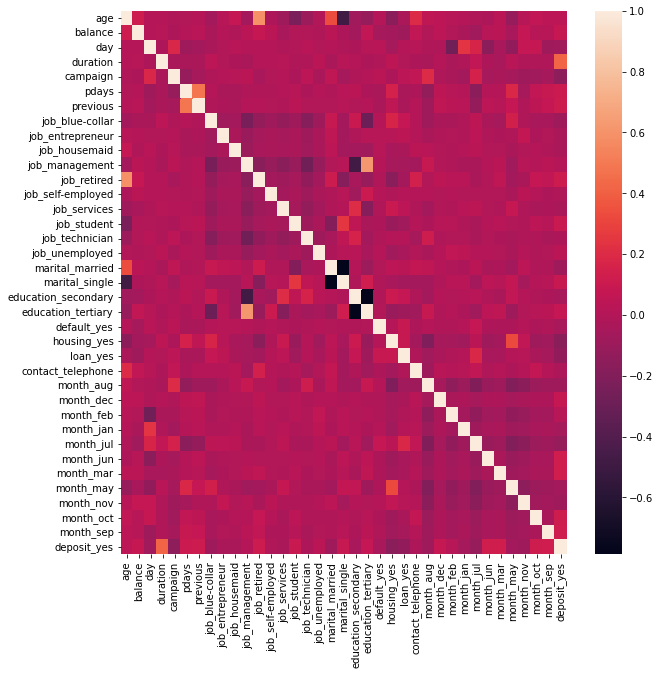

In [ ]:
correlation_matrix = pd.DataFrame(X2).corr()
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [ ]:
num_classes = 2
batch_size = 16
epochs = 10


y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
n_x = X_train.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_x,)))
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation= 'softmax'))
model.summary()

model.compile(loss= losses.categorical_crossentropy,
              optimizer='adam',
              metrics=[metrics.categorical_accuracy])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_339 (Dense)           (None, 200)               7400      
                                                                 
 dropout_226 (Dropout)       (None, 200)               0         
                                                                 
 dense_340 (Dense)           (None, 200)               40200     
                                                                 
 dropout_227 (Dropout)       (None, 200)               0         
                                                                 
 dense_341 (Dense)           (None, 2)                 402       
                                                                 
Total params: 48,002
Trainable params: 48,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
368/368 [============================